# Face Embedding

Embedding 이란?
- **고차원의 정보를 저차원으로 변환하면서 필요한 정보를 보존하는 것**
- 즉, 텍스트나 이미지의 object에 대해서 컴퓨터가 이해할 수 있도록 벡터형태로 바꿔주는 것


In [1]:
#######################
### Install modules ###
#######################
! pip install Dlib
! pip install face_recognition

     |████████████████████████████████| 100.1 MB 14 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=be8aaf7a98b4469b13cd7cae7d6171eeff906d1a8ff22a93f904f47d7ed14693
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


## Collect images (me & celebs)

the num of celeb images: 302, celeb_file_list: ['obama.jpg', 'biden.jpg', 'bush.jpeg', 'clinton.jpeg', 'trump.jpg', '고창석.jpeg', '야마다 타카유키.jpeg', '장동건.jpeg', '최준석.jpg', '이대호.jpeg', '박찬호.jpg', '류현진.jpg', '박용택.jpg', '무라니시.png', '서강준.jpg', '박항서.jpg', '김학범.jpg', '손흥민.jpg', '윤경신.jpg', '차두리.jpeg', '이동국.jpeg', '기성용.jpg', '류승룡.jpeg', '황병국.jpg', '하정우.jpg', '강동원.jpg', '이정재.jpeg', '차범근.jpeg', '배성재.jpg', '배성우.png', '조승우.jpeg', '유해진.jpg', '김윤석.jpeg', '주진모(올드).jpg', '권태원.jpeg', '박성호.jpg', '김상호.png', '도지한.jpg', '이범수.jpeg', '박서준.jpeg', '김민재.jpeg', '조달환.png', '공유.jpg', '방시혁.jpeg', '박진영.jpg', '박재범.jpg', '지드래곤.jpeg', '정형돈.jpg', '노홍철.jpeg', '유재석.jpg', '이재용.jpg', '박명수.jpg', '정준하.jpg', '길.jpg', '개리.jpg', '개코.jpeg', '슈퍼비.jpeg', '씨잼.jpg', '스윙스.jpeg', '매드클라ᄋ

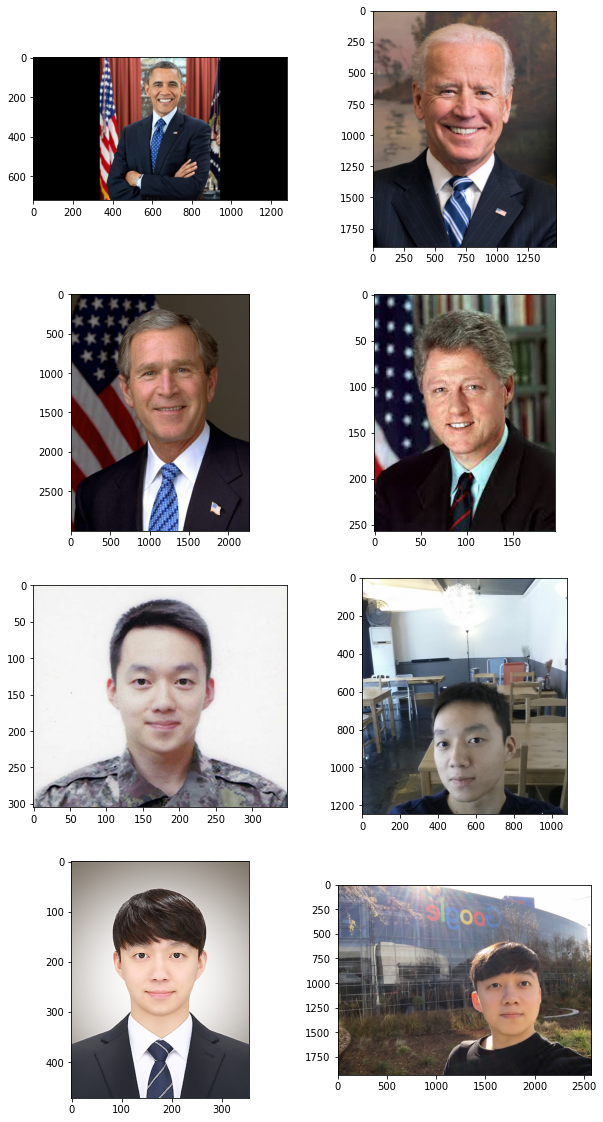

In [2]:
######################
### Collect images ###
######################
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

dir_path = r"/content/drive/MyDrive/AIFFEL/Exploration/face_embedding/original_images"
file_list = os.listdir(dir_path)
celeb_file_list = [file for file in file_list if not file.startswith("jaewoong")]
my_file_list = [file for file in file_list if file.startswith("jaewoong")]

print ("the num of celeb images: {}, celeb_file_list: {}".format(len(celeb_file_list), celeb_file_list))
print ("the num of my images: {}, my_file_list: {}".format(len(my_file_list), my_file_list))

#Set figsize here
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    n_celebs = 4
    if i < n_celebs:
        image = img.imread(dir_path+'/'+celeb_file_list[i])    
    else:
        image = img.imread(dir_path+'/'+my_file_list[i-n_celebs])
    ax.imshow(image)
plt.show()

fig.tight_layout()

## Recognize & crop face

In [3]:
from PIL import Image
import os, face_recognition
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path = r"/content/drive/MyDrive/AIFFEL/Exploration/face_embedding/original_images"
path_to_save = r"/content/drive/MyDrive/AIFFEL/Exploration/face_embedding/cropped_images"
if not os.path.isdir(path_to_save):
    os.makedirs(path_to_save)
file_list = os.listdir(image_path)
print(f'연예인 사진 총 {len(file_list)-4}개') # 총개수 - 내 사진 4장

def get_cropped_face(image_file):
    cropped_face = []
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    try:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
    except:
        print('face detection fail...', face_locations)
        
    return cropped_face

for file in file_list:
    file_name = file.split('.')[0]
    file_path = os.path.join(image_path, file)
    face = get_cropped_face(file_path)
    img_arr_path = os.path.join(path_to_save, file)
    if face == []:
        print(file, 'file error!')
        print('\n')
        continue
    pillow_image = Image.fromarray(face)
    pillow_image.save(img_arr_path)

연예인 사진 총 302개


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


## Extract face embedding

In [4]:
# 얼굴영역으로부터 얼굴 임베딩 벡터 구하기
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리{이름:임베딩벡터}
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for i, file in enumerate(file_list):
        file_name = file.split('.')[0]
        file_path = os.path.join(dir_path, file)
        face = get_cropped_face(file_path)
        if face == []:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # detection fail나는 경우 방지
            embedding_dict[file_name] = embedding[0]
        else:
            continue
        print(i, file_name)
        print(embedding[0])
    return embedding_dict

embedding_dict = get_face_embedding_dict(path_to_save)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


Streaming output truncated to the last 5000 lines.
 -0.03525333 -0.08874912 -0.13991338 -0.05998803  0.10591664 -0.08690316
  0.0442768   0.0178207 ]
106 브래들리 쿠퍼
[-0.24224591  0.10878606  0.14128682  0.00266491 -0.13120644  0.0198256
  0.03835318 -0.08568147  0.16548459 -0.04021782  0.15338404 -0.02194444
 -0.27206582  0.02071477  0.00943413  0.09011917 -0.08988461 -0.10207929
 -0.15467973 -0.08210755 -0.02397262  0.01613483  0.00840139 -0.00193479
 -0.07540683 -0.34335399 -0.05478809 -0.12422265  0.10227565 -0.13485469
  0.04457924  0.03580669 -0.1531142  -0.09273832 -0.0292222   0.05145285
 -0.08640157 -0.03024076  0.26828209 -0.06729473 -0.16638938  0.00757629
  0.02194729  0.33846569  0.18028046  0.04892774  0.03830452 -0.10711564
  0.19186489 -0.29066947  0.05366489  0.14016005  0.11384869  0.05453612
  0.13151437 -0.17413722  0.08404699  0.05716825 -0.27801836  0.21687034
  0.10786337 -0.08658867 -0.05510575 -0.06475747  0.23777041  0.04080377
 -0.12618682 -0.14117649  0.1

## Compare image embeddings

- **L2 Norm Distance**   

$$d(p,q)=d(q,p)= \sqrt{(q_1 −p_1)^2 +(q_2 −p_2 )^2 +⋅⋅⋅+(q_n −p_n )^2}= \sqrt{\sum_{i=1}^n(q_i - p_i)^2}$$

- numpy.linalg.norm를 활용하여 L2 Norm Distance로 계산
- 2차원 유클리디안 거리를 다차원으로 확장시킨 것
​


In [5]:
import numpy as np

def get_distance(diff, ord=2):
    return np.linalg.norm(diff, ord=ord)

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])
diff = y-x # [1,1,1,1,1]

print(get_distance(diff,1)) # L1 distance
print(get_distance(diff,2)) # L2 distance

5.0
2.23606797749979


- L1 distance 보다 L2 distance의 결과 값이 더 작은 이유는?
    - CS231n과 Regulation을 다시 기억해보면 L1 distance는 이 차이를 그냥 합하고, L2 distance는 차이를 제곱하여 모두 더한 후 제곱근을 구하므로 보통 더 작음
- 그럼 L1, L2 distance는 각각 언제 어떻게 사용해야 하는지?
    - 보통 L2 distance을 많이 사용하지만, 일부 상황에서는 L1 distance를 사용해야 할 때가 존재함. 이해를 위해 아래 간단한 예시를 보면서 한번 더 집고 넘어가보자

In [6]:
diff1 = np.array([7,7,7,7])
diff2 = np.array([14,14,0,0])
diff3 = np.array([28,0,0,0])

print('------ L1 distance ------')
print(get_distance(diff1,1)) # L1 distance
print(get_distance(diff2,1)) # L1 distance
print(get_distance(diff3,1)) # L1 distance

print('------ L2 distance ------')
print(get_distance(diff1,2)) # L2 distance
print(get_distance(diff2,2)) # L2 distance
print(get_distance(diff3,2)) # L2 distance

------ L1 distance ------
28.0
28.0
28.0
------ L2 distance ------
14.0
19.79898987322333
28.0


- L1 distance로는 모두 같은 값을 가지지만, L2 distance는 차이가 큼
    - 서로 다른 요소를 가지고 있는 feature(diff1,2,3 벡터)는 각 unique한 L2 값(14, 19.8, 28)을 가지는 반면, L1은 feature가 없는(요소가 0인) 부분에서도 같은 값(28)을 가질 수 있음
- L2는 제곱으로 모든 요소의 특성을 전부 살려내므로써 모든 feature를 고르게 표현할 때 적합
- **L1은 diff2,3처럼 feature의 요소를 일부 0으로(불필요한 feature는 무시) 설정이 가능하므로 특정 feature가 중요할 때 적합**
    - 이게 바로 앞에서 말한 일부 상황에서 L1을 사용하는 이유
    - feature 요소가 고르게 분포할 수록 그만큼 outlier가 존재하며 L2의 결과에 영향을 미치게 되므로, 이를 제거하고 L1처럼 사용해야하는 상황이 존재한다는 것   

- 정리하자면...
    - L1 → feature 중 일부분 중요
    - L2 → feature 전부 고르게 중요   
    (Ridge regression와 Lasso regression을 조금 더 찾아보면서 이해하자)

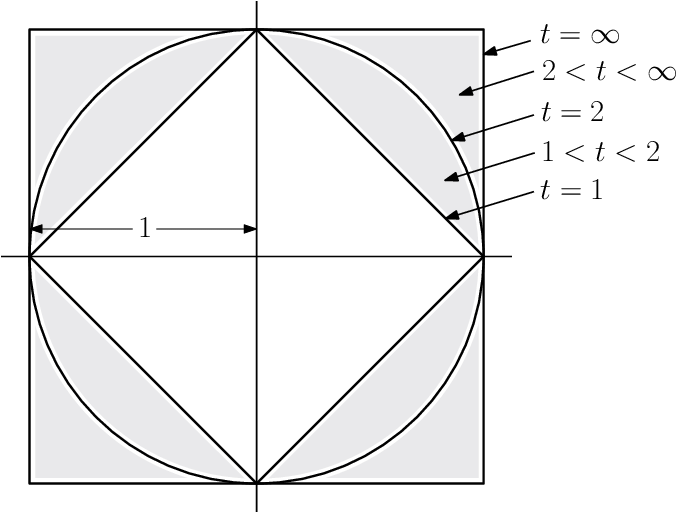

In [7]:
from IPython.display import Image
Image('/content/drive/MyDrive/AIFFEL/Exploration/face_embedding/different_L_t_norms.png')

In [8]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)
    
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('jaewoong_1')
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('jaewoong_1',
  array([-0.10478584, -0.00374015, -0.00629311, -0.03357765, -0.04585442,
         -0.01513448, -0.04028118, -0.14179152,  0.12785874, -0.11585438,
          0.19630168, -0.01828592, -0.15155035, -0.11899535, -0.0496002 ,
          0.18859392, -0.16960578, -0.14085951, -0.02696174, -0.00799529,
          0.10464939,  0.00675788, -0.02321206,  0.07233101, -0.12446067,
         -0.29335931, -0.08598076, -0.08058324, -0.03714858, -0.02108302,
         -0.04576987,  0.06970879, -0.19934472,  0.01621177,  0.04775194,
          0.09441479,  0.01414276, -0.01364971,  0.15500173,  0.03183191,
         -0.21475898,  0.06743719,  0.03155041,  0.26058519,  0.2151483 ,
          0.00652229, -0.00546099, -0.15624292,  0.15577775, -0.17962347,
          0.02613506,  0.13423583,  0.05054678,  0.03000213, -0.01312653,
         -0.11910593,  0.0196683 ,  0.07466226, -0.1358337 ,  0.0347136 ,
          0.06216054, -0.09400579, -0.09594728, -0.13350296,  0.19297199,
          0.08343348, 

In [10]:
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x: sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    
    return sorted_faces

nearest_faces = get_nearest_face('jaewoong_1')

순위 1 : 이름(jaewoong_2), 거리(0.3001775969936912)
순위 2 : 이름(jaewoong_4), 거리(0.3950220401657048)
순위 3 : 이름(jaewoong_3), 거리(0.40625272532863616)
순위 4 : 이름(김래원), 거리(0.41137154429548956)
순위 5 : 이름(김명민), 거리(0.41439703643865017)
순위 6 : 이름(목진화), 거리(0.41629717853858933)
순위 7 : 이름(이은형), 거리(0.4304137169946372)
순위 8 : 이름(서강준), 거리(0.4315711603156179)
순위 9 : 이름(문재윤), 거리(0.43161686890430584)
순위 10 : 이름(케이), 거리(0.4336350324908398)


## Visualize result

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,30))
cropped_img_dir = r'/content/drive/MyDrive/AIFFEL/Exploration/face_embedding/cropped_images'
for i, ax in enumerate(axes.flatten()):
        image = img.imread(cropped_img_dir+'/'+nearest_faces[i][0]+'.jpg')    
    ax.imshow(image)
    ax.imshow(r'/content/drive/MyDrive/AIFFEL/Exploration/face_embedding/cropped_images/jaewoong_1.jpg', alpha=0.5)
plt.show()

fig.tight_layout()

IndentationError: ignored

## 결론

- 가장 닮은 연예인 Best5까지만 구하면 내사진을 제외하고 순위 3~8이지만 순위 9위에 특별한(?) 연예인이 존재하여 10위까지 출력함
- 임베딩 거리가 전부 0.5 이내인 닮은 연예인들이 결과로 나왔으며
- 실제로 닮은 정도를 비교해보기 위해 matplotlib으로 순위에 해당하는 연예인들과 나의 비교 이미지를 겹쳐서 표현
- 이번 프로젝트를 진행하면서 사실 가장 궁금했던 것중 하나가 내 사진끼리도 찍은 시기가 전부 다르고 머리 길이도 달라서 임베딩 비교 시 차이가 많이 날 것이라고 추측하였으나, 놀랍게도 가장 상위 순위에 존재하여 신기하였음